In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from src.PLS.utils import sims_graphs
from matplotlib.lines import Line2D

In [2]:
Typ = ["simple", "simple_I0", "meta"][2]
siz = ["10", "100", "1000"][2]
factor = 1000/int(siz)
seed = 1912
sim_scen = ["", "c1", "c2", "c3"][0]
beta_controls = np.arange(0, 1.1, 0.1)
gamma_additives = np.arange(0, 10, 1)
thinning_intensities = np.arange(0, 0.55, 0.05)
thinning_frequencies = np.arange(0.5, 3.0, 0.5)
n_runs = 200

In [3]:
if Typ == "meta":

    import numpy as np
    from src.PLS.metaSIR import meta_no_ext_sir
    from src.PLS.metaSIR import meta_timed_sir
    from decimal import Decimal, ROUND_UP
    from src.PLS.utils import basic_kernel
    from src.PLS.utils import basic_square_map
    from src.PLS.utils import straight_line_distances
    from src.PLS.ODE_tools import run_meta_model

    #ODEs
    N = 4
    tim = np.arange(0, 20 + 0.2, 0.2)
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    y0 = [999, 1, 0, 1000, 0, 0, 1000, 0, 0, 1000, 0, 0]
    meta_out = run_meta_model(5 / 1000, 1, y0, 20, False, basic_kernel, test_distances).y

    #Reality
    distance_measure_array = ["sum_sq", "sum_sqrt_sq", "mixed", "rinf", "meta"]
    dis = distance_measure_array[-1]
    seed = 1
    N = 4
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    R0 = 5
    gamma = 1
    X0 = [[999, 1, 0]]
    div = sum(X0[0])
    for i in range(N - 1):
        X0.append([1000, 0, 0])
    beta = R0 / div
    rng = np.random.default_rng(seed)
    tstep = 0.01
    tmax = 100
    tmax = float(Decimal(tstep) * (
                Decimal(meta_timed_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)) / Decimal(
            tstep)).quantize(1, rounding=ROUND_UP))
    rng = np.random.default_rng(seed)
    reality_3 = meta_no_ext_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)

C:\Users\ollie\AppData\Local\Temp\ipykernel_12012\261921178.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


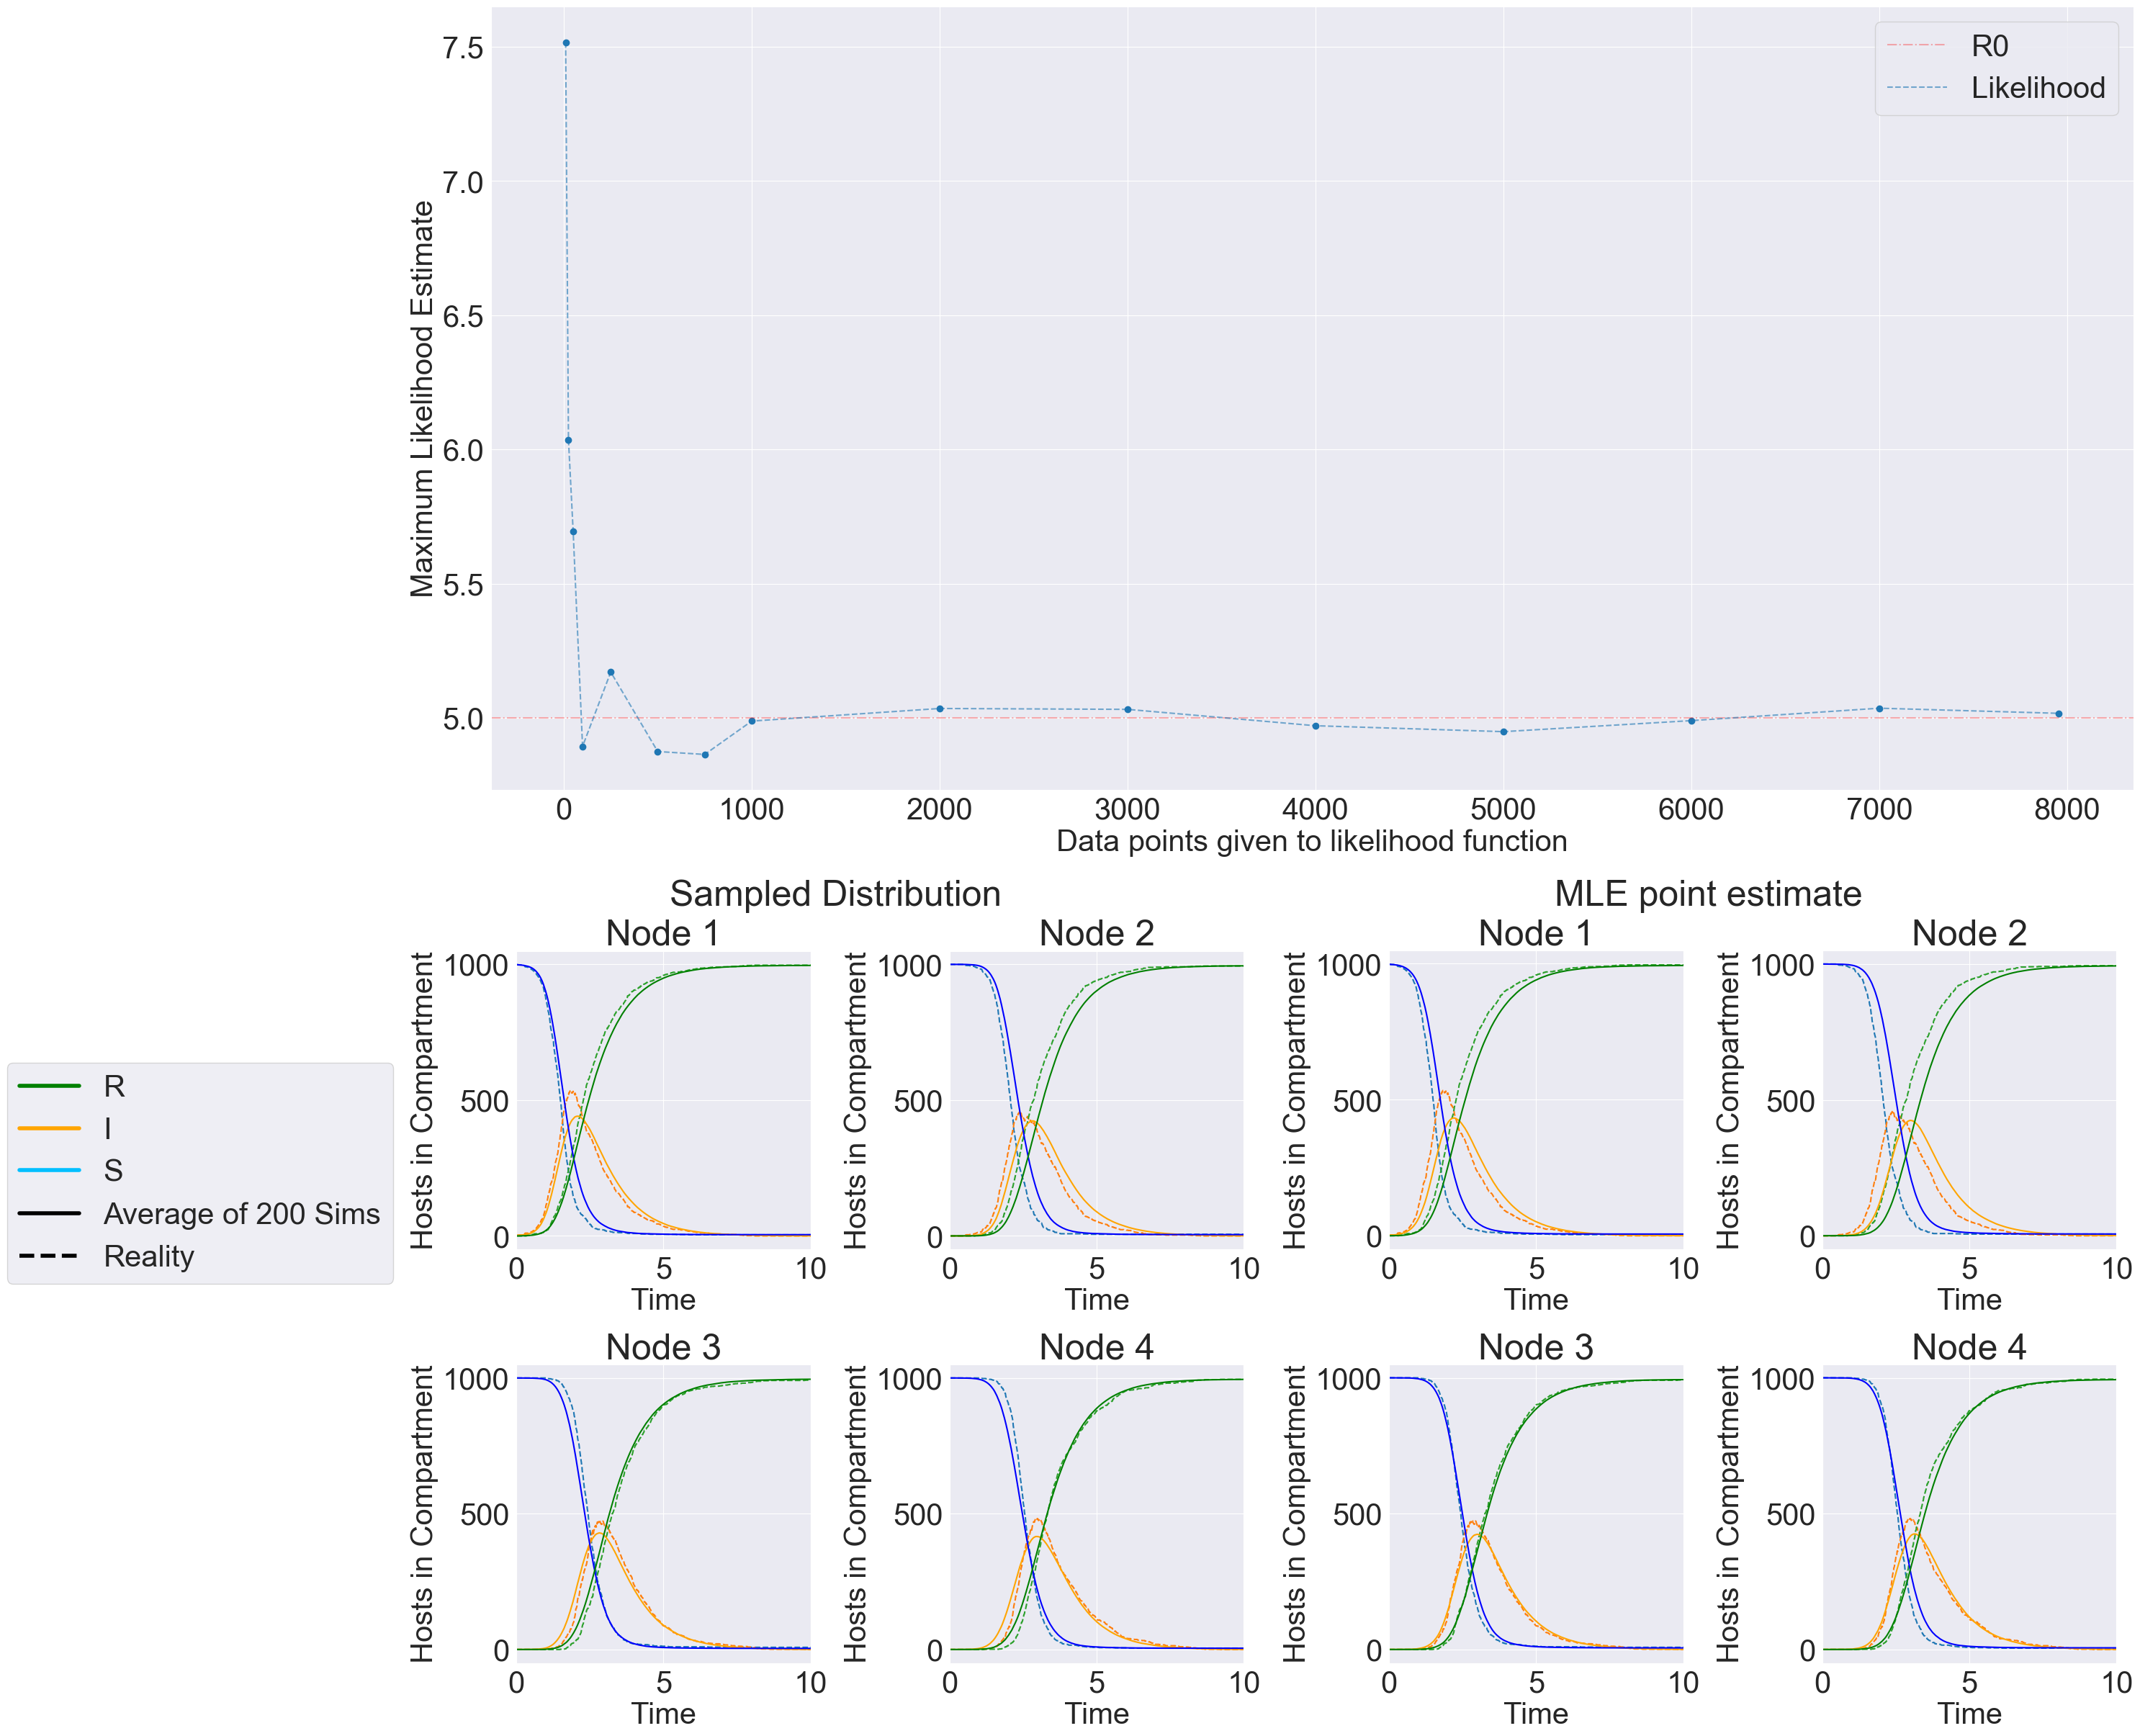

In [11]:
if Typ == "meta":
    fig = plt.figure(layout='constrained', figsize=(24, 24))
    subfigs = fig.subfigures(2, 1, wspace=0.07)
    font = {'size': 30}
    # using rc function
    plt.rc('font', **font)
    subfigsnest = subfigs[1].subfigures(1, 2)
    for k in range(0,2):
        ax0 = subfigsnest[k].subplots(nrows=2,ncols=2)
        if k ==0:
            distro = np.genfromtxt(f"../../../Data/R0_3/Sims_SIR/Sampled_distros/Distro_{Typ}_{siz}.csv", delimiter=",")[0:n_runs]
            output_dictionary = sims_graphs(distro, Typ, siz, seed, sim_scen, beta_controls[:],ext=True)
            plot_dict = {}
            plot_dict["Runs"] = []
            plot_dict["T"] = []
            for i in range(0, 1):
                plot_dict["Runs"].append(np.mean(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]), axis=0))
                plot_dict["T"].append(np.mean(output_dictionary["T"][i:i + n_runs]))
        else:
            distro = [np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_5\\Fitted\\MLE_meta_b.csv", delimiter=",")]*n_runs
            output_dictionary = sims_graphs(distro, Typ, siz, seed, sim_scen, beta_controls[:],ext=True)
            plot_dict = {}
            plot_dict["Runs"] = []
            plot_dict["T"] = []
            for i in range(0, 1):
                plot_dict["Runs"].append(np.mean(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]), axis=0))
                plot_dict["T"].append(np.mean(output_dictionary["T"][i:i + n_runs]))

        times = np.arange(0,max(plot_dict["T"]),0.01)
        run_times = np.arange(0,tmax,tstep)
        counter = -1

        for i in range(0,2):
            for j in range(0,2):
                counter +=1
                ax0[i,j].plot(run_times, np.array(reality_3[:,counter]/factor), linestyle = "--")
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),1], color = "orange", alpha = 1)
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),0], color = "b", alpha = 1)
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),2], color = "g", alpha = 1)
                #sns.lineplot(x=tim,y=meta_out[0+(counter)*3],ax=ax0[i,j],linestyle = "-.", color="blue")
                #sns.lineplot(x=tim,y=meta_out[1+counter*3],ax=ax0[i,j],linestyle = "-.", color="orange")
                #sns.lineplot(x=tim,y=meta_out[2+counter*3],ax=ax0[i,j],linestyle = "-.",color="green")
                ax0[i,j].set_xlabel("Time")
                ax0[i,j].set_ylabel("Hosts in Compartment")
                ax0[i,j].set_title(f"Node {counter+1}")
                ax0[i,j].set_xlim(0,10)
        legend_elements = [Line2D([0], [0], color='g', lw=4, label='R'),
                       Line2D([0], [0], color='orange',lw=4, label='I'),
                           Line2D([0], [0], color='deepskyblue', lw=4, label='S'),
                       Line2D([0], [0], color='black',lw=4, label='Average of 200 Sims'),
                       Line2D([0], [0], color='black',linestyle="--",lw=4, label='Reality')]
        subfigsnest[k].suptitle(f"{['Sampled Distribution','MLE point estimate'][k]}")
        if k ==0:
            subfigsnest[k].legend(handles=legend_elements, bbox_to_anchor = (0,0.8))

    #Top Fig

    ax0 =  subfigs[0].subplots()
    mle_fits = np.genfromtxt("MLE_graph.csv", delimiter=",")
    subset_points = [10, 25, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 7954]
    ax0.set_xlabel("Data points given to likelihood function")
    ax0.set_ylabel("Maximum Likelihood Estimate")
    ax0.axhline(5, color="r", linestyle="-.", alpha=0.3, label="R0")
    ax0.scatter(subset_points, mle_fits)
    ax0.plot(subset_points, mle_fits, linestyle="--", alpha=0.6, label="Likelihood")
    ax0.legend()
    fig.show()